#### Data Preprocessing


- Step 1. Convert BDD100k into coco format

In [ ]:
import os
import json
from tqdm import tqdm


bdd_dir ="./"

src_val_dir = os.path.join(bdd_dir, 'labels', 'bdd100k_labels_images_val.json')
src_train_dir = os.path.join(bdd_dir, 'labels', 'bdd100k_labels_images_train.json')

os.makedirs(os.path.join(bdd_dir, 'labels_coco'), exist_ok=True)

dst_val_dir = os.path.join(bdd_dir, 'labels_coco', 'bdd100k_labels_images_val_coco.json')
dst_train_dir = os.path.join(bdd_dir, 'labels_coco', 'bdd100k_labels_images_train_coco.json')


def bdd2coco_detection(labeled_images, save_dir):
  attr_dict = {"categories":
    [
      {"supercategory": "none", "id": 1, "name": "person"},
      {"supercategory": "none", "id": 2, "name": "car"},
      {"supercategory": "none", "id": 3, "name": "rider"},
      {"supercategory": "none", "id": 4, "name": "bus"},
      {"supercategory": "none", "id": 5, "name": "truck"},
      {"supercategory": "none", "id": 6, "name": "bike"},
      {"supercategory": "none", "id": 7, "name": "motor"},
      {"supercategory": "none", "id": 8, "name": "traffic light"},
      {"supercategory": "none", "id": 9, "name": "traffic sign"},
      # {"supercategory": "none", "id": 10, "name": "train"},
    ]}

  id_dict = {i['name']: i['id'] for i in attr_dict['categories']}

  images = list()
  annotations = list()
  ignore_categories = set()

  counter = 0
  for i in tqdm(labeled_images):
    counter += 1
    image = dict()
    image['file_name'] = i['name']
    image['height'] = 720
    image['width'] = 1280

    image['id'] = counter

    empty_image = True

    tmp = 0
    for l in i['labels']:
      annotation = dict()
      if l['category'] in id_dict.keys():
        tmp = 1
        empty_image = False
        annotation["iscrowd"] = 0
        annotation["image_id"] = image['id']
        x1 = l['box2d']['x1']
        y1 = l['box2d']['y1']
        x2 = l['box2d']['x2']
        y2 = l['box2d']['y2']
        annotation['bbox'] = [x1, y1, x2 - x1, y2 - y1]
        annotation['area'] = float((x2 - x1) * (y2 - y1))
        annotation['category_id'] = id_dict[l['category']]
        annotation['ignore'] = 0
        annotation['id'] = l['id']
        annotation['segmentation'] = [[x1, y1, x1, y2, x2, y2, x2, y1]]
        annotations.append(annotation)
      else:
        ignore_categories.add(l['category'])

    if empty_image:
      print('empty image!')
      continue
    if tmp == 1:
      images.append(image)

  attr_dict["images"] = images
  attr_dict["annotations"] = annotations
  attr_dict["type"] = "instances"

  print('ignored categories: ', ignore_categories)
  print('saving...')
  with open(save_dir, "w") as file:
    json.dump(attr_dict, file)
  print('Done.')


def main():
  # create BDD training set detections in COCO format
  print('Loading training set...')
  with open(src_train_dir) as f:
    train_labels = json.load(f)
  print('Converting training set...')
  bdd2coco_detection(train_labels, dst_train_dir)

  # create BDD validation set detections in COCO format
  print('Loading validation set...')
  with open(src_val_dir) as f:
    val_labels = json.load(f)
  print('Converting validation set...')
  bdd2coco_detection(val_labels, dst_val_dir)


bdd_dir ="./"

src_val_dir = os.path.join(bdd_dir, 'labels', 'bdd100k_labels_images_val.json')
src_train_dir = os.path.join(bdd_dir, 'labels', 'bdd100k_labels_images_train.json')

os.makedirs(os.path.join(bdd_dir, 'labels_coco'), exist_ok=True)

dst_val_dir = os.path.join(bdd_dir, 'labels_coco', 'bdd100k_labels_images_val_coco.json')
dst_train_dir = os.path.join(bdd_dir, 'labels_coco', 'bdd100k_labels_images_train_coco.json')


def bdd2coco_detection(labeled_images, save_dir):
  attr_dict = {"categories":
    [
      {"supercategory": "none", "id": 1, "name": "person"},
      {"supercategory": "none", "id": 2, "name": "car"},
      {"supercategory": "none", "id": 3, "name": "rider"},
      {"supercategory": "none", "id": 4, "name": "bus"},
      {"supercategory": "none", "id": 5, "name": "truck"},
      {"supercategory": "none", "id": 6, "name": "bike"},
      {"supercategory": "none", "id": 7, "name": "motor"},
      {"supercategory": "none", "id": 8, "name": "traffic light"},
      {"supercategory": "none", "id": 9, "name": "traffic sign"},
      # {"supercategory": "none", "id": 10, "name": "train"},
    ]}

  id_dict = {i['name']: i['id'] for i in attr_dict['categories']}

  images = list()
  annotations = list()
  ignore_categories = set()

  counter = 0
  for i in tqdm(labeled_images):
    counter += 1
    image = dict()
    image['file_name'] = i['name']
    image['height'] = 720
    image['width'] = 1280

    image['id'] = counter

    empty_image = True

    tmp = 0
    for l in i['labels']:
      annotation = dict()
      if l['category'] in id_dict.keys():
        tmp = 1
        empty_image = False
        annotation["iscrowd"] = 0
        annotation["image_id"] = image['id']
        x1 = l['box2d']['x1']
        y1 = l['box2d']['y1']
        x2 = l['box2d']['x2']
        y2 = l['box2d']['y2']
        annotation['bbox'] = [x1, y1, x2 - x1, y2 - y1]
        annotation['area'] = float((x2 - x1) * (y2 - y1))
        annotation['category_id'] = id_dict[l['category']]
        annotation['ignore'] = 0
        annotation['id'] = l['id']
        annotation['segmentation'] = [[x1, y1, x1, y2, x2, y2, x2, y1]]
        annotations.append(annotation)
      else:
        ignore_categories.add(l['category'])

    if empty_image:
      print('empty image!')
      continue
    if tmp == 1:
      images.append(image)

  attr_dict["images"] = images
  attr_dict["annotations"] = annotations
  attr_dict["type"] = "instances"

  print('ignored categories: ', ignore_categories)
  print('saving...')
  with open(save_dir, "w") as file:
    json.dump(attr_dict, file)
  print('Done.')

In [ ]:
# create BDD training set detections in COCO format
print('Loading training set...')
with open(src_train_dir) as f:
    train_labels = json.load(f)
print('Converting training set...')
bdd2coco_detection(train_labels, dst_train_dir)

# create BDD validation set detections in COCO format
print('Loading validation set...')
with open(src_val_dir) as f:
    val_labels = json.load(f)
print('Converting validation set...')
bdd2coco_detection(val_labels, dst_val_dir)# create BDD training set detections in COCO format
print('Loading training set...')
with open(src_train_dir) as f:
    train_labels = json.load(f)
print('Converting training set...')
bdd2coco_detection(train_labels, dst_train_dir)

# create BDD validation set detections in COCO format
print('Loading validation set...')
with open(src_val_dir) as f:
    val_labels = json.load(f)
print('Converting validation set...')
bdd2coco_detection(val_labels, dst_val_dir)

- Step2. Convert coco format into yolo fomrat

In [ ]:
from ultralytics.data.converter import convert_coco

convert_coco(labels_dir="labels_coco")

- Data Splitting 

As the test dataset is not publicly open, we split the train set to train/val and use the val set as the test set

Orginal Train: 70000
Original Val : 10000

change to

Train: 60000
Val: 10000
Test: 10000 (val set of original data)

In [ ]:
import os
import shutil
import random

image_src_dir = "./data/images/train"
label_src_dir = "./data/labels/train"

image_dest_dir = "./data/images/train_val"
label_dest_dir = "./data/labels/train_val"

os.makedirs(image_dest_dir, exist_ok=True)
os.makedirs(label_dest_dir, exist_ok=True)

image_files = {os.path.splitext(f)[0] for f in os.listdir(image_src_dir) if f.endswith(".jpg")}
label_files = {os.path.splitext(f)[0] for f in os.listdir(label_src_dir) if f.endswith(".txt")}
matched_files = list(image_files & label_files)  

num_matched = len(matched_files)

random.shuffle(matched_files)

if num_matched < 10000:
    remaining_files = list(image_files - set(matched_files))  
    random.shuffle(remaining_files)
    extra_needed = 10000 - num_matched
    matched_files.extend(remaining_files[:extra_needed])

selected_files = matched_files[:10000]

for file in selected_files:
    image_path = os.path.join(image_src_dir, file+'.jpg')
    label_path = os.path.join(label_src_dir, file+'.txt')

    image_dest_path = os.path.join(image_dest_dir, file+'.jpg')
    label_dest_path = os.path.join(label_dest_dir, file+'.txt')

    shutil.move(image_path, image_dest_path)

    shutil.move(label_path, label_dest_path)

print("DONE")

##### Train

In [10]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import gc
import torch
import pandas as pd
import cv2


In [ ]:
# Model Train Code

model = YOLO("yolo11n.pt")
train_results = model.train(
    data="bdd.yaml",  
    epochs=30, 
    imgsz=640, 
    batch=128,
    device=0,
    project='./runs/epoch1',
    name='train'
)

# Model evaluation on test set

metrics = model.val(split='val',
        project='./runs/epoch1',
        name='test')


In [2]:
def train(model, epoch, batch_size):
    model.train(
        data="bdd.yaml",  
        epochs=epoch, 
        imgsz=640, 
        batch=batch_size,
        device=0,
        project=f'./runs/epoch{epoch}_batch{batch_size}',
        name='train'
    )



In [ ]:
model =  YOLO("yolo11n.pt")
train(model, epoch=30, batch_size=32)

del model
torch.cuda.empty_cache()
gc.collect()

Ultralytics 8.3.86 🚀 Python-3.9.21 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 3090, 24161MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=bdd.yaml, epochs=30, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=./runs/epoch30_batch32, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True

train: Scanning /home/dilab/Seong/dl_proj/data/labels/train_train.cache... 59863 images, 137 backgrounds, 0 corrupt: 100%|██████████| 60000/60000 [00:00<?, ?it/s]
val: Scanning /home/dilab/Seong/dl_proj/data/labels/train_val.cache... 10000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10000/10000 [00:00<?, ?it/s]


Plotting labels to runs/epoch30_batch32/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/epoch30_batch32/train2
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      6.51G      1.545      1.566      1.072       1003        640: 100%|██████████| 1875/1875 [04:15<00:00,  7.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:32<00:00,  4.88it/s]


                   all      10000     182186      0.433      0.298      0.291      0.158

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      6.87G      1.477       1.12      1.034        974        640: 100%|██████████| 1875/1875 [04:11<00:00,  7.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:29<00:00,  5.26it/s]


                   all      10000     182186      0.455      0.335      0.327      0.175

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      7.71G      1.488      1.067      1.038        952        640: 100%|██████████| 1875/1875 [04:08<00:00,  7.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:30<00:00,  5.09it/s]


                   all      10000     182186       0.44      0.305      0.295      0.156

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      7.55G      1.477      1.023      1.037       1153        640: 100%|██████████| 1875/1875 [04:08<00:00,  7.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:29<00:00,  5.35it/s]


                   all      10000     182186      0.492      0.354       0.35      0.186

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      7.99G      1.436     0.9658      1.022       1087        640: 100%|██████████| 1875/1875 [04:08<00:00,  7.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:30<00:00,  5.11it/s]


                   all      10000     182186      0.495      0.372      0.372        0.2

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      7.41G      1.416      0.939      1.015        800        640: 100%|██████████| 1875/1875 [04:07<00:00,  7.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:30<00:00,  5.12it/s]


                   all      10000     182186      0.542      0.378      0.394      0.215

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      6.61G      1.401     0.9182      1.008       1085        640: 100%|██████████| 1875/1875 [04:08<00:00,  7.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:31<00:00,  5.06it/s]


                   all      10000     182186      0.529      0.393      0.404      0.222

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      8.18G      1.389     0.9041      1.004       1034        640: 100%|██████████| 1875/1875 [04:07<00:00,  7.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:30<00:00,  5.06it/s]


                   all      10000     182186       0.55      0.398      0.418      0.231

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      8.46G      1.378     0.8922     0.9999       1398        640: 100%|██████████| 1875/1875 [04:07<00:00,  7.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:31<00:00,  5.05it/s]


                   all      10000     182186      0.565      0.404       0.43      0.236

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      9.38G       1.37     0.8807     0.9968       1153        640: 100%|██████████| 1875/1875 [04:08<00:00,  7.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:30<00:00,  5.08it/s]


                   all      10000     182186      0.578      0.411      0.437      0.242

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30       8.6G      1.365     0.8744     0.9951       1098        640: 100%|██████████| 1875/1875 [04:07<00:00,  7.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:30<00:00,  5.12it/s]


                   all      10000     182186      0.587      0.412      0.443      0.245

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      7.13G      1.357      0.866     0.9919       1097        640: 100%|██████████| 1875/1875 [04:08<00:00,  7.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:30<00:00,  5.06it/s]


                   all      10000     182186      0.594      0.412      0.448      0.249

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30       7.8G      1.351     0.8597     0.9894        967        640: 100%|██████████| 1875/1875 [04:07<00:00,  7.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:30<00:00,  5.11it/s]


                   all      10000     182186      0.582       0.42      0.451      0.251

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30        10G      1.344     0.8512     0.9869        955        640: 100%|██████████| 1875/1875 [04:08<00:00,  7.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:31<00:00,  5.04it/s]


                   all      10000     182186      0.591      0.421      0.453      0.253

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      8.59G      1.341     0.8472     0.9853       1041        640: 100%|██████████| 1875/1875 [04:07<00:00,  7.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:30<00:00,  5.08it/s]


                   all      10000     182186      0.587      0.423      0.456      0.254

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      10.8G      1.338     0.8406     0.9837       1083        640: 100%|██████████| 1875/1875 [04:08<00:00,  7.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:30<00:00,  5.07it/s]


                   all      10000     182186        0.6      0.422      0.459      0.256

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30       7.6G      1.333      0.836     0.9823       1286        640: 100%|██████████| 1875/1875 [04:03<00:00,  7.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:17<00:00,  8.99it/s]


                   all      10000     182186      0.604      0.425      0.462      0.258

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      7.85G      1.327     0.8303     0.9802       1088        640: 100%|██████████| 1875/1875 [04:04<00:00,  7.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:30<00:00,  5.19it/s]


                   all      10000     182186      0.604      0.427      0.463      0.259

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      8.51G      1.323      0.824     0.9791        922        640: 100%|██████████| 1875/1875 [04:06<00:00,  7.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:29<00:00,  5.34it/s]


                   all      10000     182186      0.604      0.428      0.464       0.26

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      7.72G      1.319     0.8209     0.9773        818        640: 100%|██████████| 1875/1875 [04:06<00:00,  7.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:30<00:00,  5.20it/s]


                   all      10000     182186      0.609      0.427      0.466      0.261
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      7.09G      1.352     0.8192     0.9808        621        640: 100%|██████████| 1875/1875 [03:55<00:00,  7.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:30<00:00,  5.21it/s]


                   all      10000     182186       0.61      0.427      0.467      0.261

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      6.13G      1.346     0.8128     0.9791        497        640: 100%|██████████| 1875/1875 [03:55<00:00,  7.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:29<00:00,  5.25it/s]


                   all      10000     182186      0.607      0.431      0.467      0.262

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      5.11G       1.34     0.8055     0.9766        590        640: 100%|██████████| 1875/1875 [03:54<00:00,  7.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:29<00:00,  5.26it/s]


                   all      10000     182186      0.612      0.428      0.468      0.262

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      6.42G      1.335     0.7997     0.9738        548        640: 100%|██████████| 1875/1875 [03:55<00:00,  7.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:29<00:00,  5.24it/s]


                   all      10000     182186      0.609      0.431      0.469      0.263

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      6.75G      1.331     0.7935     0.9732        547        640: 100%|██████████| 1875/1875 [03:55<00:00,  7.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:30<00:00,  5.20it/s]


                   all      10000     182186      0.606      0.432       0.47      0.264

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      5.84G      1.325     0.7875     0.9704        587        640: 100%|██████████| 1875/1875 [03:54<00:00,  7.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:29<00:00,  5.24it/s]


                   all      10000     182186      0.609      0.433      0.471      0.264

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      6.71G       1.32     0.7804     0.9684        549        640: 100%|██████████| 1875/1875 [03:55<00:00,  7.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:29<00:00,  5.24it/s]


                   all      10000     182186      0.609      0.432      0.472      0.265

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      5.77G      1.312     0.7732     0.9654        495        640: 100%|██████████| 1875/1875 [03:54<00:00,  7.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:30<00:00,  5.21it/s]


                   all      10000     182186      0.607      0.435      0.473      0.265

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      6.71G      1.308     0.7657     0.9637        567        640: 100%|██████████| 1875/1875 [03:55<00:00,  7.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:30<00:00,  5.21it/s]


                   all      10000     182186      0.613      0.432      0.474      0.266

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      6.43G      1.301     0.7597     0.9623        514        640: 100%|██████████| 1875/1875 [03:54<00:00,  7.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:29<00:00,  5.23it/s]


                   all      10000     182186      0.608      0.436      0.474      0.267

30 epochs completed in 2.292 hours.
Optimizer stripped from runs/epoch30_batch32/train2/weights/last.pt, 5.4MB
Optimizer stripped from runs/epoch30_batch32/train2/weights/best.pt, 5.4MB

Validating runs/epoch30_batch32/train2/weights/best.pt...
Ultralytics 8.3.86 🚀 Python-3.9.21 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 3090, 24161MiB)
YOLO11n summary (fused): 100 layers, 2,583,907 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:53<00:00,  2.92it/s]


                   all      10000     182186      0.609      0.436      0.474      0.267
                person       3130      12876      0.614      0.455      0.503       0.24
                   car       9898     101525        0.7      0.688      0.728      0.448
                 rider        528        653      0.569      0.298      0.326      0.158
                   bus       1323       1694      0.632      0.515      0.559      0.433
                 truck       2682       4168      0.592      0.512      0.543      0.394
                  bike        637       1038       0.51      0.301       0.32      0.148
                 motor        330        425      0.585      0.235      0.292      0.144
         traffic light       5490      25702       0.61      0.457      0.474      0.169
          traffic sign       8148      34105      0.667      0.464      0.525      0.266
Speed: 0.1ms preprocess, 0.4ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs/epoch3

NameError: name 'torch' is not defined

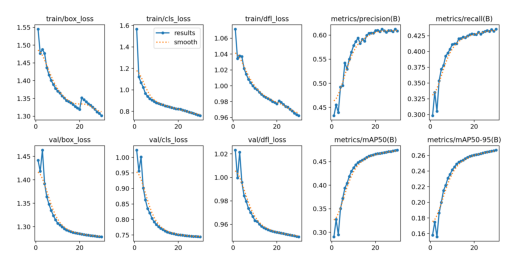

In [2]:
img = mpimg.imread('./runs/epoch30_batch32/train2/results.png')
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()


In [18]:
model =  YOLO("yolo11n.pt")
train(model, epoch=50, batch_size=32)

del model
torch.cuda.empty_cache()
gc.collect()
torch.cuda.empty_cache()
gc.collect()

Ultralytics 8.3.86 🚀 Python-3.9.21 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 3090, 24161MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=bdd.yaml, epochs=50, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=./runs/epoch50_batch32, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True,

train: Scanning /home/dilab/Seong/dl_proj/data/labels/train_train.cache... 59863 images, 137 backgrounds, 0 corrupt: 100%|██████████| 60000/60000 [00:00<?, ?it/s]
val: Scanning /home/dilab/Seong/dl_proj/data/labels/train_val.cache... 10000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10000/10000 [00:00<?, ?it/s]


Plotting labels to runs/epoch50_batch32/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/epoch50_batch32/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      6.54G      1.545      1.566      1.072       1003        640: 100%|██████████| 1875/1875 [04:13<00:00,  7.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:31<00:00,  5.03it/s]


                   all      10000     182186      0.433      0.298      0.291      0.158

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      6.88G      1.477       1.12      1.035        974        640: 100%|██████████| 1875/1875 [04:10<00:00,  7.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:29<00:00,  5.24it/s]


                   all      10000     182186      0.469      0.322      0.326      0.175

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      7.71G       1.49       1.07      1.039        952        640: 100%|██████████| 1875/1875 [04:07<00:00,  7.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:30<00:00,  5.13it/s]


                   all      10000     182186      0.423      0.308      0.295      0.156

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      7.55G       1.48      1.026      1.038       1153        640: 100%|██████████| 1875/1875 [04:06<00:00,  7.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:30<00:00,  5.20it/s]


                   all      10000     182186      0.471      0.331      0.334      0.177

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50         8G      1.439     0.9683      1.023       1087        640: 100%|██████████| 1875/1875 [04:06<00:00,  7.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:30<00:00,  5.20it/s]


                   all      10000     182186      0.502      0.361      0.367      0.201

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      7.41G      1.419     0.9417      1.016        800        640: 100%|██████████| 1875/1875 [04:06<00:00,  7.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:30<00:00,  5.17it/s]


                   all      10000     182186      0.538      0.376       0.39      0.212

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      6.61G      1.404     0.9224       1.01       1085        640: 100%|██████████| 1875/1875 [04:07<00:00,  7.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:29<00:00,  5.32it/s]


                   all      10000     182186      0.548       0.39      0.404      0.222

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      8.18G      1.393     0.9085      1.005       1034        640: 100%|██████████| 1875/1875 [04:07<00:00,  7.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:30<00:00,  5.18it/s]


                   all      10000     182186      0.557      0.394      0.416      0.228

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      8.46G      1.383     0.8975      1.002       1398        640: 100%|██████████| 1875/1875 [04:06<00:00,  7.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:29<00:00,  5.23it/s]


                   all      10000     182186      0.566      0.404      0.427      0.234

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      9.39G      1.377     0.8885     0.9995       1153        640: 100%|██████████| 1875/1875 [04:07<00:00,  7.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:30<00:00,  5.22it/s]


                   all      10000     182186      0.583      0.402      0.435       0.24

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50       8.6G      1.372     0.8818     0.9982       1098        640: 100%|██████████| 1875/1875 [04:06<00:00,  7.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:30<00:00,  5.22it/s]


                   all      10000     182186      0.576      0.416      0.439      0.242

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      7.13G      1.365     0.8746     0.9948       1097        640: 100%|██████████| 1875/1875 [04:07<00:00,  7.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:29<00:00,  5.36it/s]


                   all      10000     182186      0.586      0.413      0.445      0.246

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50       7.8G       1.36     0.8688     0.9931        967        640: 100%|██████████| 1875/1875 [04:07<00:00,  7.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:30<00:00,  5.21it/s]


                   all      10000     182186      0.581      0.422      0.449      0.249

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50        10G      1.354     0.8619     0.9906        955        640: 100%|██████████| 1875/1875 [04:06<00:00,  7.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:29<00:00,  5.24it/s]


                   all      10000     182186      0.589      0.426      0.453      0.251

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      8.59G      1.352     0.8584     0.9904       1041        640: 100%|██████████| 1875/1875 [04:07<00:00,  7.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:30<00:00,  5.17it/s]


                   all      10000     182186       0.59      0.427      0.456      0.253

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      10.9G       1.35     0.8543     0.9886       1083        640: 100%|██████████| 1875/1875 [04:06<00:00,  7.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:30<00:00,  5.18it/s]


                   all      10000     182186      0.592       0.43      0.459      0.254

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50       7.6G      1.347     0.8518     0.9876       1286        640: 100%|██████████| 1875/1875 [04:07<00:00,  7.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:30<00:00,  5.15it/s]


                   all      10000     182186      0.596      0.428       0.46      0.255

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      7.85G      1.342     0.8465     0.9863       1088        640: 100%|██████████| 1875/1875 [04:07<00:00,  7.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:30<00:00,  5.22it/s]


                   all      10000     182186      0.597      0.433      0.461      0.256

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      8.51G      1.339      0.843     0.9849        922        640: 100%|██████████| 1875/1875 [04:06<00:00,  7.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:30<00:00,  5.12it/s]


                   all      10000     182186      0.597      0.434      0.462      0.257

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      7.72G      1.337     0.8408     0.9841        818        640: 100%|██████████| 1875/1875 [04:07<00:00,  7.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:30<00:00,  5.19it/s]


                   all      10000     182186      0.594      0.434      0.463      0.258

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      8.85G      1.334     0.8369     0.9835        939        640: 100%|██████████| 1875/1875 [04:06<00:00,  7.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:30<00:00,  5.19it/s]


                   all      10000     182186        0.6      0.431      0.464      0.258

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      7.89G      1.331     0.8333     0.9813        980        640: 100%|██████████| 1875/1875 [04:07<00:00,  7.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:30<00:00,  5.22it/s]


                   all      10000     182186      0.603      0.432      0.465      0.259

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      8.35G       1.33     0.8324     0.9806        970        640: 100%|██████████| 1875/1875 [04:07<00:00,  7.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:30<00:00,  5.18it/s]


                   all      10000     182186      0.603      0.431      0.466       0.26

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      7.05G      1.327     0.8277     0.9801       1178        640: 100%|██████████| 1875/1875 [04:07<00:00,  7.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:29<00:00,  5.36it/s]


                   all      10000     182186      0.606      0.431      0.468      0.261

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50       9.6G      1.324     0.8232     0.9791       1186        640: 100%|██████████| 1875/1875 [04:07<00:00,  7.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:30<00:00,  5.19it/s]


                   all      10000     182186      0.608      0.431      0.468      0.261

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      10.3G      1.323      0.822     0.9777       1097        640: 100%|██████████| 1875/1875 [04:06<00:00,  7.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:30<00:00,  5.16it/s]


                   all      10000     182186      0.612      0.431      0.469      0.262

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      7.35G      1.318     0.8191     0.9769       1131        640: 100%|██████████| 1875/1875 [04:07<00:00,  7.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:30<00:00,  5.17it/s]


                   all      10000     182186      0.611      0.431       0.47      0.262

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      8.87G      1.318     0.8173     0.9764       1022        640: 100%|██████████| 1875/1875 [04:06<00:00,  7.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:30<00:00,  5.23it/s]


                   all      10000     182186      0.616      0.431      0.471      0.263

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      8.63G      1.315      0.814     0.9749       1134        640: 100%|██████████| 1875/1875 [04:07<00:00,  7.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:29<00:00,  5.35it/s]


                   all      10000     182186      0.616      0.431      0.472      0.264

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      8.27G      1.315     0.8124     0.9753       1129        640: 100%|██████████| 1875/1875 [04:07<00:00,  7.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:30<00:00,  5.19it/s]


                   all      10000     182186      0.619      0.431      0.473      0.264

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50       8.3G       1.31     0.8088     0.9735       1034        640: 100%|██████████| 1875/1875 [04:07<00:00,  7.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:30<00:00,  5.22it/s]


                   all      10000     182186      0.621      0.432      0.474      0.265

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      8.38G      1.308     0.8065     0.9727       1119        640: 100%|██████████| 1875/1875 [04:07<00:00,  7.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:30<00:00,  5.20it/s]


                   all      10000     182186      0.624       0.43      0.474      0.266

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      7.38G      1.305     0.8027     0.9719       1022        640: 100%|██████████| 1875/1875 [04:06<00:00,  7.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:30<00:00,  5.22it/s]


                   all      10000     182186      0.627       0.43      0.476      0.267

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      7.22G      1.305      0.803     0.9714       1017        640: 100%|██████████| 1875/1875 [04:07<00:00,  7.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:30<00:00,  5.19it/s]


                   all      10000     182186      0.629       0.43      0.477      0.268

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      8.12G      1.299     0.7981     0.9698        960        640: 100%|██████████| 1875/1875 [04:06<00:00,  7.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:30<00:00,  5.19it/s]


                   all      10000     182186      0.623      0.433      0.478      0.268

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      9.62G      1.299     0.7962     0.9695        991        640: 100%|██████████| 1875/1875 [04:06<00:00,  7.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:30<00:00,  5.22it/s]


                   all      10000     182186      0.621      0.435      0.479      0.269

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      7.32G      1.299     0.7938     0.9688        937        640: 100%|██████████| 1875/1875 [04:07<00:00,  7.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:29<00:00,  5.25it/s]


                   all      10000     182186      0.623      0.436      0.481       0.27

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      8.91G      1.294       0.79     0.9668       1343        640: 100%|██████████| 1875/1875 [04:06<00:00,  7.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:30<00:00,  5.19it/s]


                   all      10000     182186      0.621      0.437      0.482       0.27

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      7.35G      1.291     0.7857     0.9662        951        640: 100%|██████████| 1875/1875 [04:07<00:00,  7.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:30<00:00,  5.13it/s]


                   all      10000     182186      0.622      0.439      0.482      0.271

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50       6.1G      1.286     0.7816     0.9643       1041        640: 100%|██████████| 1875/1875 [04:06<00:00,  7.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:30<00:00,  5.18it/s]


                   all      10000     182186      0.621       0.44      0.483      0.271
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      5.51G      1.322     0.7829     0.9682        513        640: 100%|██████████| 1875/1875 [03:56<00:00,  7.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:29<00:00,  5.31it/s]


                   all      10000     182186      0.625      0.439      0.483      0.272

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50       6.2G      1.317     0.7754     0.9659        516        640: 100%|██████████| 1875/1875 [03:55<00:00,  7.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:30<00:00,  5.23it/s]


                   all      10000     182186      0.632      0.436      0.484      0.272

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      7.12G      1.314     0.7718     0.9656        535        640: 100%|██████████| 1875/1875 [03:54<00:00,  7.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:30<00:00,  5.15it/s]


                   all      10000     182186      0.628      0.439      0.484      0.272

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      6.16G       1.31      0.768     0.9641        484        640: 100%|██████████| 1875/1875 [03:55<00:00,  7.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:30<00:00,  5.20it/s]


                   all      10000     182186       0.63       0.44      0.485      0.273

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      6.87G      1.306     0.7633      0.963        566        640: 100%|██████████| 1875/1875 [03:55<00:00,  7.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:30<00:00,  5.22it/s]


                   all      10000     182186      0.633      0.439      0.485      0.273

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50       5.7G      1.303     0.7586     0.9617        588        640: 100%|██████████| 1875/1875 [03:55<00:00,  7.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:29<00:00,  5.25it/s]


                   all      10000     182186       0.63      0.442      0.486      0.274

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      5.51G      1.299     0.7545       0.96        549        640: 100%|██████████| 1875/1875 [03:55<00:00,  7.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:29<00:00,  5.23it/s]


                   all      10000     182186       0.63      0.441      0.486      0.274

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      5.49G      1.295       0.75     0.9585        619        640: 100%|██████████| 1875/1875 [03:55<00:00,  7.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:30<00:00,  5.22it/s]


                   all      10000     182186      0.628      0.443      0.487      0.275

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      5.73G       1.29     0.7448     0.9569        542        640: 100%|██████████| 1875/1875 [03:55<00:00,  7.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:30<00:00,  5.23it/s]


                   all      10000     182186      0.629      0.443      0.488      0.275

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50       6.3G      1.287     0.7401      0.956        618        640: 100%|██████████| 1875/1875 [03:55<00:00,  7.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:30<00:00,  5.21it/s]


                   all      10000     182186      0.629      0.443      0.489      0.276

50 epochs completed in 3.838 hours.
Optimizer stripped from runs/epoch50_batch32/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/epoch50_batch32/train/weights/best.pt, 5.5MB

Validating runs/epoch50_batch32/train/weights/best.pt...
Ultralytics 8.3.86 🚀 Python-3.9.21 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 3090, 24161MiB)
YOLO11n summary (fused): 100 layers, 2,583,907 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:53<00:00,  2.94it/s]


                   all      10000     182186      0.629      0.442      0.489      0.276
                person       3130      12876      0.631      0.452      0.514      0.247
                   car       9898     101525      0.691      0.698      0.733      0.454
                 rider        528        653      0.615      0.286      0.344       0.17
                   bus       1323       1694      0.625      0.536       0.57      0.444
                 truck       2682       4168      0.603      0.527      0.557      0.405
                  bike        637       1038      0.538      0.296      0.326      0.152
                 motor        330        425      0.664      0.247      0.327      0.157
         traffic light       5490      25702      0.612       0.47      0.488      0.176
          traffic sign       8148      34105      0.684      0.471      0.539      0.275
Speed: 0.1ms preprocess, 0.4ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs/epoch5

0

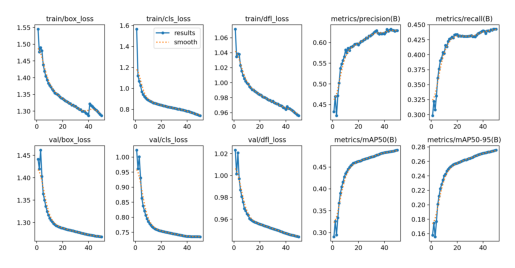

In [3]:
img = mpimg.imread('./runs/epoch50_batch32/train/results.png')
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()


In [19]:
model =  YOLO("yolo11n.pt")
train(model, epoch=30, batch_size=64)

del model
torch.cuda.empty_cache()
gc.collect()
torch.cuda.empty_cache()
gc.collect()

Ultralytics 8.3.86 🚀 Python-3.9.21 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 3090, 24161MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=bdd.yaml, epochs=30, time=None, patience=100, batch=64, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=./runs/epoch30_batch64, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True

train: Scanning /home/dilab/Seong/dl_proj/data/labels/train_train.cache... 59863 images, 137 backgrounds, 0 corrupt: 100%|██████████| 60000/60000 [00:00<?, ?it/s]
val: Scanning /home/dilab/Seong/dl_proj/data/labels/train_val.cache... 10000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10000/10000 [00:00<?, ?it/s]


Plotting labels to runs/epoch30_batch64/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/epoch30_batch64/train2
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      13.2G      1.551      1.642      1.074       1015        640: 100%|██████████| 938/938 [03:52<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 79/79 [00:31<00:00,  2.50it/s]


                   all      10000     182186      0.417       0.29      0.285      0.156

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      13.6G       1.48      1.141      1.035        923        640: 100%|██████████| 938/938 [03:52<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 79/79 [00:30<00:00,  2.61it/s]


                   all      10000     182186      0.422      0.269      0.242      0.121

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30        15G      1.496      1.087       1.04       1134        640: 100%|██████████| 938/938 [03:52<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 79/79 [00:29<00:00,  2.67it/s]


                   all      10000     182186      0.369      0.282      0.252      0.128

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      17.3G      1.479      1.027      1.037        921        640: 100%|██████████| 938/938 [03:52<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 79/79 [00:29<00:00,  2.70it/s]


                   all      10000     182186      0.463      0.319      0.323      0.173

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      15.5G      1.438     0.9679      1.022       1070        640: 100%|██████████| 938/938 [03:43<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 79/79 [00:28<00:00,  2.76it/s]


                   all      10000     182186      0.467      0.351      0.351      0.188

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      14.1G      1.414     0.9363      1.013        845        640: 100%|██████████| 938/938 [03:53<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 79/79 [00:29<00:00,  2.65it/s]


                   all      10000     182186      0.519      0.358      0.377      0.204

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      13.8G      1.398     0.9167      1.007        811        640: 100%|██████████| 938/938 [03:53<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 79/79 [00:28<00:00,  2.75it/s]


                   all      10000     182186      0.526      0.379      0.393      0.214

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      15.7G      1.386     0.8999      1.003       1356        640: 100%|██████████| 938/938 [03:53<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 79/79 [00:29<00:00,  2.64it/s]


                   all      10000     182186      0.556      0.388      0.414      0.228

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      15.2G      1.376     0.8893     0.9992       1005        640: 100%|██████████| 938/938 [03:53<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 79/79 [00:28<00:00,  2.75it/s]


                   all      10000     182186       0.56      0.402      0.423      0.232

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      14.5G      1.368     0.8777     0.9957       1058        640: 100%|██████████| 938/938 [03:53<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 79/79 [00:30<00:00,  2.63it/s]


                   all      10000     182186      0.576      0.407      0.433       0.24

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30        17G      1.362     0.8706     0.9938       1170        640: 100%|██████████| 938/938 [03:53<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 79/79 [00:29<00:00,  2.71it/s]


                   all      10000     182186      0.578      0.412      0.438      0.243

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      14.5G      1.356     0.8617     0.9905        933        640: 100%|██████████| 938/938 [03:53<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 79/79 [00:29<00:00,  2.64it/s]


                   all      10000     182186      0.582      0.419      0.449      0.249

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      14.8G      1.348     0.8544     0.9886       1191        640: 100%|██████████| 938/938 [03:53<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 79/79 [00:29<00:00,  2.66it/s]


                   all      10000     182186      0.598      0.419      0.454      0.252

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30        17G      1.345     0.8483     0.9865       1046        640: 100%|██████████| 938/938 [03:53<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 79/79 [00:29<00:00,  2.63it/s]


                   all      10000     182186      0.597      0.424      0.457      0.254

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      17.1G      1.341     0.8454     0.9853        953        640: 100%|██████████| 938/938 [03:53<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 79/79 [00:29<00:00,  2.65it/s]


                   all      10000     182186      0.602      0.424       0.46      0.257

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      15.9G      1.336     0.8394     0.9831        867        640: 100%|██████████| 938/938 [03:53<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 79/79 [00:29<00:00,  2.67it/s]


                   all      10000     182186      0.602      0.428      0.462      0.258

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30        15G       1.33     0.8326     0.9815        987        640: 100%|██████████| 938/938 [03:53<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 79/79 [00:29<00:00,  2.65it/s]


                   all      10000     182186      0.605      0.427      0.464       0.26

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      14.7G      1.324     0.8265     0.9802        992        640: 100%|██████████| 938/938 [03:52<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 79/79 [00:30<00:00,  2.62it/s]


                   all      10000     182186      0.607      0.427      0.466       0.26

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      15.2G      1.321     0.8219     0.9776        849        640: 100%|██████████| 938/938 [03:53<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 79/79 [00:29<00:00,  2.67it/s]


                   all      10000     182186      0.603       0.43      0.467      0.261

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30        14G      1.316     0.8178     0.9761        933        640: 100%|██████████| 938/938 [03:52<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 79/79 [00:29<00:00,  2.66it/s]


                   all      10000     182186      0.611      0.432      0.469      0.262
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      12.7G      1.351     0.8192     0.9806        615        640: 100%|██████████| 938/938 [03:42<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 79/79 [00:29<00:00,  2.64it/s]


                   all      10000     182186      0.622      0.428       0.47      0.262

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      13.9G      1.345      0.811     0.9788        512        640: 100%|██████████| 938/938 [03:40<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 79/79 [00:30<00:00,  2.63it/s]


                   all      10000     182186      0.617       0.43      0.471      0.263

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      10.3G       1.34     0.8047     0.9762        582        640: 100%|██████████| 938/938 [03:41<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 79/79 [00:30<00:00,  2.61it/s]


                   all      10000     182186      0.615      0.432      0.471      0.263

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      11.4G      1.333     0.7969     0.9733        533        640: 100%|██████████| 938/938 [03:40<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 79/79 [00:30<00:00,  2.63it/s]


                   all      10000     182186      0.613      0.434      0.473      0.264

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      11.7G       1.33      0.792     0.9728        545        640: 100%|██████████| 938/938 [03:41<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 79/79 [00:30<00:00,  2.60it/s]


                   all      10000     182186      0.618      0.434      0.473      0.265

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      10.5G      1.323     0.7842       0.97        596        640: 100%|██████████| 938/938 [03:40<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 79/79 [00:29<00:00,  2.64it/s]


                   all      10000     182186      0.617      0.435      0.474      0.265

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      12.9G      1.319     0.7789     0.9682        556        640: 100%|██████████| 938/938 [03:41<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 79/79 [00:29<00:00,  2.65it/s]


                   all      10000     182186      0.623      0.433      0.475      0.266

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      11.3G      1.312     0.7704     0.9664        489        640: 100%|██████████| 938/938 [03:41<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 79/79 [00:29<00:00,  2.68it/s]


                   all      10000     182186      0.618      0.438      0.476      0.267

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      11.1G      1.307     0.7648     0.9643        558        640: 100%|██████████| 938/938 [03:41<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 79/79 [00:30<00:00,  2.62it/s]


                   all      10000     182186      0.625      0.436      0.477      0.267

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      11.9G        1.3     0.7579     0.9618        497        640: 100%|██████████| 938/938 [03:41<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 79/79 [00:29<00:00,  2.64it/s]


                   all      10000     182186      0.625      0.435      0.478      0.268

30 epochs completed in 2.168 hours.
Optimizer stripped from runs/epoch30_batch64/train2/weights/last.pt, 5.4MB
Optimizer stripped from runs/epoch30_batch64/train2/weights/best.pt, 5.4MB

Validating runs/epoch30_batch64/train2/weights/best.pt...
Ultralytics 8.3.86 🚀 Python-3.9.21 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 3090, 24161MiB)
YOLO11n summary (fused): 100 layers, 2,583,907 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 79/79 [00:52<00:00,  1.50it/s]


                   all      10000     182186      0.625      0.435      0.478      0.268
                person       3130      12876      0.638      0.448      0.506      0.242
                   car       9898     101525      0.714      0.682      0.729      0.449
                 rider        528        653      0.592      0.297      0.332      0.158
                   bus       1323       1694      0.629      0.506       0.56      0.433
                 truck       2682       4168      0.592      0.515      0.544      0.394
                  bike        637       1038       0.53      0.303      0.317      0.147
                 motor        330        425      0.628      0.254      0.303       0.15
         traffic light       5490      25702      0.622      0.452      0.479      0.171
          traffic sign       8148      34105       0.68      0.459      0.528      0.267
Speed: 0.1ms preprocess, 0.3ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/epoch3

0

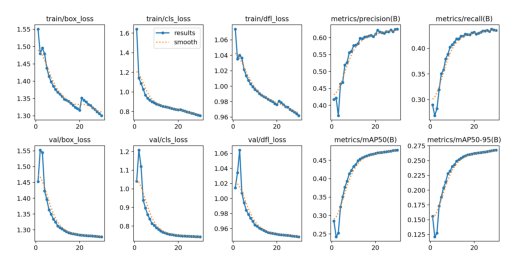

In [4]:
img = mpimg.imread('./runs/epoch30_batch64/train2/results.png')
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()


In [20]:
model =  YOLO("yolo11n.pt")
train(model, epoch=50, batch_size=64)

del model
torch.cuda.empty_cache()
gc.collect()
torch.cuda.empty_cache()
gc.collect()

Ultralytics 8.3.86 🚀 Python-3.9.21 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 3090, 24161MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=bdd.yaml, epochs=50, time=None, patience=100, batch=64, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=./runs/epoch50_batch64, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True,

train: Scanning /home/dilab/Seong/dl_proj/data/labels/train_train.cache... 59863 images, 137 backgrounds, 0 corrupt: 100%|██████████| 60000/60000 [00:00<?, ?it/s]
val: Scanning /home/dilab/Seong/dl_proj/data/labels/train_val.cache... 10000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10000/10000 [00:00<?, ?it/s]


Plotting labels to runs/epoch50_batch64/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/epoch50_batch64/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      13.2G      1.551      1.642      1.074       1015        640: 100%|██████████| 938/938 [03:53<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 79/79 [00:30<00:00,  2.58it/s]


                   all      10000     182186      0.417       0.29      0.285      0.156

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      13.6G       1.48      1.142      1.036        923        640: 100%|██████████| 938/938 [03:53<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 79/79 [00:29<00:00,  2.63it/s]


                   all      10000     182186      0.472      0.289      0.285      0.147

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50        15G      1.498      1.089      1.041       1134        640: 100%|██████████| 938/938 [03:53<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 79/79 [00:28<00:00,  2.78it/s]


                   all      10000     182186      0.401      0.256      0.233      0.116

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      17.3G       1.48      1.029      1.038        921        640: 100%|██████████| 938/938 [03:53<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 79/79 [00:29<00:00,  2.64it/s]


                   all      10000     182186      0.512      0.319      0.325      0.171

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      15.5G       1.44     0.9694      1.023       1070        640: 100%|██████████| 938/938 [03:53<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 79/79 [00:29<00:00,  2.68it/s]


                   all      10000     182186      0.489      0.347      0.349      0.187

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      14.1G      1.418     0.9406      1.015        845        640: 100%|██████████| 938/938 [03:53<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 79/79 [00:30<00:00,  2.62it/s]


                   all      10000     182186      0.522       0.36      0.369      0.199

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      13.8G      1.401     0.9195      1.009        811        640: 100%|██████████| 938/938 [03:53<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 79/79 [00:29<00:00,  2.65it/s]


                   all      10000     182186      0.526       0.37      0.389      0.211

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      15.7G       1.39     0.9048      1.005       1356        640: 100%|██████████| 938/938 [03:53<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 79/79 [00:30<00:00,  2.63it/s]


                   all      10000     182186      0.551      0.384       0.41      0.225

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      15.2G       1.38     0.8945      1.001       1005        640: 100%|██████████| 938/938 [03:53<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 79/79 [00:30<00:00,  2.61it/s]


                   all      10000     182186      0.549      0.402      0.418      0.231

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      14.5G      1.374     0.8841     0.9983       1058        640: 100%|██████████| 938/938 [03:53<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 79/79 [00:29<00:00,  2.64it/s]


                   all      10000     182186      0.557      0.408      0.428      0.236

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50        17G       1.37     0.8789     0.9968       1170        640: 100%|██████████| 938/938 [03:53<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 79/79 [00:29<00:00,  2.64it/s]


                   all      10000     182186      0.586      0.404      0.438      0.242

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      14.5G      1.363     0.8703     0.9934        933        640: 100%|██████████| 938/938 [03:53<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 79/79 [00:29<00:00,  2.66it/s]


                   all      10000     182186      0.582      0.411      0.443      0.245

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      14.8G      1.358     0.8651     0.9919       1191        640: 100%|██████████| 938/938 [03:53<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 79/79 [00:30<00:00,  2.61it/s]


                   all      10000     182186      0.589      0.415      0.447      0.248

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50        17G      1.355     0.8597     0.9906       1046        640: 100%|██████████| 938/938 [03:53<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 79/79 [00:30<00:00,  2.63it/s]


                   all      10000     182186      0.576      0.426      0.451       0.25

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      17.1G      1.353     0.8584     0.9901        953        640: 100%|██████████| 938/938 [03:54<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 79/79 [00:30<00:00,  2.63it/s]


                   all      10000     182186      0.589      0.425      0.455      0.252

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      15.9G      1.349     0.8538     0.9884        867        640: 100%|██████████| 938/938 [03:53<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 79/79 [00:30<00:00,  2.63it/s]


                   all      10000     182186      0.593       0.43      0.458      0.254

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50        15G      1.344     0.8481     0.9866        987        640: 100%|██████████| 938/938 [03:54<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 79/79 [00:30<00:00,  2.61it/s]


                   all      10000     182186      0.588      0.429       0.46      0.256

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      14.7G      1.339     0.8432     0.9855        992        640: 100%|██████████| 938/938 [03:53<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 79/79 [00:29<00:00,  2.65it/s]


                   all      10000     182186      0.598      0.429      0.462      0.257

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      15.2G      1.337     0.8399     0.9837        849        640: 100%|██████████| 938/938 [03:53<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 79/79 [00:29<00:00,  2.64it/s]


                   all      10000     182186      0.597      0.432      0.464      0.258

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50        14G      1.334      0.838     0.9829        933        640: 100%|██████████| 938/938 [03:53<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 79/79 [00:30<00:00,  2.60it/s]


                   all      10000     182186      0.601      0.431      0.465      0.259

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      17.9G      1.333     0.8344     0.9821       1253        640: 100%|██████████| 938/938 [03:54<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 79/79 [00:30<00:00,  2.62it/s]


                   all      10000     182186      0.603      0.433      0.467       0.26

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      16.4G      1.328     0.8305     0.9808       1068        640: 100%|██████████| 938/938 [03:53<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 79/79 [00:29<00:00,  2.64it/s]


                   all      10000     182186      0.605      0.432      0.468       0.26

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      15.2G      1.327     0.8284     0.9804        991        640: 100%|██████████| 938/938 [03:54<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 79/79 [00:29<00:00,  2.64it/s]


                   all      10000     182186      0.609      0.432      0.469      0.261

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      14.2G      1.325     0.8244     0.9793       1188        640: 100%|██████████| 938/938 [03:53<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 79/79 [00:30<00:00,  2.63it/s]


                   all      10000     182186      0.614      0.432      0.469      0.261

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      17.8G      1.322     0.8221     0.9777        891        640: 100%|██████████| 938/938 [03:53<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 79/79 [00:30<00:00,  2.60it/s]


                   all      10000     182186      0.618      0.432       0.47      0.262

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      15.7G      1.319     0.8194     0.9769       1097        640: 100%|██████████| 938/938 [03:53<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 79/79 [00:29<00:00,  2.64it/s]


                   all      10000     182186      0.618      0.433      0.471      0.263

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      18.3G      1.318     0.8181     0.9767        954        640: 100%|██████████| 938/938 [03:54<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 79/79 [00:30<00:00,  2.63it/s]


                   all      10000     182186      0.619      0.435      0.472      0.263

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      13.6G      1.314     0.8146     0.9758        878        640: 100%|██████████| 938/938 [03:53<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 79/79 [00:30<00:00,  2.63it/s]


                   all      10000     182186       0.62      0.434      0.473      0.264

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      11.9G      1.313     0.8103     0.9743       1023        640: 100%|██████████| 938/938 [03:53<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 79/79 [00:30<00:00,  2.63it/s]


                   all      10000     182186      0.623      0.435      0.474      0.264

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      16.9G       1.31     0.8088     0.9728       1179        640: 100%|██████████| 938/938 [03:53<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 79/79 [00:29<00:00,  2.68it/s]


                   all      10000     182186      0.621      0.436      0.475      0.265

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      19.3G      1.308     0.8051     0.9724        927        640: 100%|██████████| 938/938 [03:54<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 79/79 [00:29<00:00,  2.65it/s]


                   all      10000     182186      0.626      0.437      0.477      0.266

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50        16G      1.307     0.8041     0.9723        949        640: 100%|██████████| 938/938 [03:53<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 79/79 [00:28<00:00,  2.74it/s]


                   all      10000     182186      0.624      0.437      0.478      0.266

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50        15G      1.305     0.8018     0.9711       1018        640: 100%|██████████| 938/938 [03:54<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 79/79 [00:29<00:00,  2.64it/s]


                   all      10000     182186      0.624      0.437      0.478      0.267

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      17.2G        1.3      0.798     0.9701       1016        640: 100%|██████████| 938/938 [03:54<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 79/79 [00:28<00:00,  2.76it/s]


                   all      10000     182186      0.628      0.436      0.479      0.268

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      15.4G      1.297     0.7929     0.9686       1318        640: 100%|██████████| 938/938 [03:54<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 79/79 [00:29<00:00,  2.64it/s]


                   all      10000     182186      0.633      0.436       0.48      0.268

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      16.5G      1.297     0.7916     0.9681        954        640: 100%|██████████| 938/938 [03:54<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 79/79 [00:29<00:00,  2.66it/s]


                   all      10000     182186       0.63      0.439      0.481      0.269

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      13.8G      1.295     0.7894     0.9675        962        640: 100%|██████████| 938/938 [03:53<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 79/79 [00:30<00:00,  2.59it/s]


                   all      10000     182186       0.63       0.44      0.481      0.269

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      15.5G       1.29     0.7858     0.9663       1042        640: 100%|██████████| 938/938 [03:53<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 79/79 [00:29<00:00,  2.66it/s]


                   all      10000     182186       0.63       0.44      0.482       0.27

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      11.3G      1.287     0.7825     0.9651        799        640: 100%|██████████| 938/938 [03:53<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 79/79 [00:29<00:00,  2.66it/s]


                   all      10000     182186       0.63      0.442      0.483       0.27

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      15.2G      1.285     0.7797     0.9643       1279        640: 100%|██████████| 938/938 [03:53<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 79/79 [00:29<00:00,  2.67it/s]


                   all      10000     182186      0.631      0.443      0.484      0.271
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50        11G       1.32     0.7802      0.968        509        640: 100%|██████████| 938/938 [03:42<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 79/79 [00:29<00:00,  2.66it/s]


                   all      10000     182186       0.63      0.443      0.484      0.271

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      11.4G      1.315     0.7747     0.9657        500        640: 100%|██████████| 938/938 [03:41<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 79/79 [00:29<00:00,  2.66it/s]


                   all      10000     182186      0.631      0.444      0.485      0.272

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50        16G      1.311     0.7699     0.9646        526        640: 100%|██████████| 938/938 [03:41<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 79/79 [00:29<00:00,  2.65it/s]


                   all      10000     182186      0.633      0.441      0.485      0.272

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      12.1G      1.308     0.7656     0.9636        477        640: 100%|██████████| 938/938 [03:42<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 79/79 [00:30<00:00,  2.61it/s]


                   all      10000     182186      0.632      0.441      0.485      0.272

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      14.6G      1.305     0.7619     0.9621        566        640: 100%|██████████| 938/938 [03:41<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 79/79 [00:29<00:00,  2.68it/s]


                   all      10000     182186      0.631      0.442      0.486      0.273

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      12.4G      1.301     0.7569     0.9612        581        640: 100%|██████████| 938/938 [03:41<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 79/79 [00:29<00:00,  2.65it/s]


                   all      10000     182186      0.629      0.443      0.486      0.273

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      11.3G      1.298     0.7528     0.9601        538        640: 100%|██████████| 938/938 [03:41<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 79/79 [00:29<00:00,  2.67it/s]


                   all      10000     182186      0.633      0.441      0.486      0.274

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      11.8G      1.293     0.7484     0.9586        610        640: 100%|██████████| 938/938 [03:42<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 79/79 [00:30<00:00,  2.63it/s]


                   all      10000     182186      0.631      0.442      0.487      0.274

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      11.2G      1.289     0.7432     0.9573        533        640: 100%|██████████| 938/938 [03:41<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 79/79 [00:29<00:00,  2.65it/s]


                   all      10000     182186      0.634      0.443      0.488      0.274

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      10.8G      1.285     0.7383      0.956        629        640: 100%|██████████| 938/938 [03:41<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 79/79 [00:29<00:00,  2.66it/s]


                   all      10000     182186      0.634      0.443      0.489      0.275

50 epochs completed in 3.647 hours.
Optimizer stripped from runs/epoch50_batch64/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/epoch50_batch64/train/weights/best.pt, 5.5MB

Validating runs/epoch50_batch64/train/weights/best.pt...
Ultralytics 8.3.86 🚀 Python-3.9.21 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 3090, 24161MiB)
YOLO11n summary (fused): 100 layers, 2,583,907 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 79/79 [00:53<00:00,  1.48it/s]


                   all      10000     182186      0.634      0.442      0.489      0.275
                person       3130      12876      0.647      0.455      0.516      0.247
                   car       9898     101525      0.707      0.693      0.735      0.454
                 rider        528        653      0.628      0.294      0.344       0.17
                   bus       1323       1694      0.638      0.518      0.572      0.443
                 truck       2682       4168      0.601      0.524      0.555      0.406
                  bike        637       1038      0.523       0.32      0.335      0.155
                 motor        330        425      0.637      0.249      0.307      0.147
         traffic light       5490      25702       0.63       0.46      0.491      0.177
          traffic sign       8148      34105      0.697      0.468      0.541      0.275
Speed: 0.1ms preprocess, 0.3ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs/epoch5

0

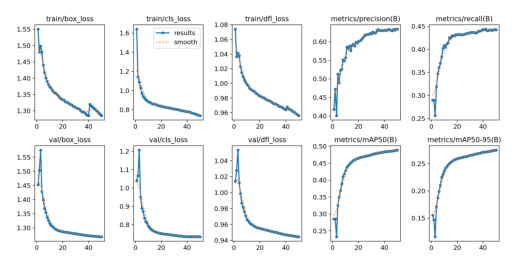

In [5]:
img = mpimg.imread('./runs/epoch50_batch64/train/results.png')
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()


In [21]:
model =  YOLO("yolo11n.pt")
train(model, epoch=30, batch_size=128)

del model
torch.cuda.empty_cache()
gc.collect()
torch.cuda.empty_cache()
gc.collect()

Ultralytics 8.3.86 🚀 Python-3.9.21 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 3090, 24161MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=bdd.yaml, epochs=30, time=None, patience=100, batch=128, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=./runs/epoch30_batch128, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tru

train: Scanning /home/dilab/Seong/dl_proj/data/labels/train_train.cache... 59863 images, 137 backgrounds, 0 corrupt: 100%|██████████| 60000/60000 [00:00<?, ?it/s]
val: Scanning /home/dilab/Seong/dl_proj/data/labels/train_val.cache... 10000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10000/10000 [00:00<?, ?it/s]


Plotting labels to runs/epoch30_batch128/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.001), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/epoch30_batch128/train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      21.3G      1.571      1.757      1.082       2860        640: 100%|██████████| 469/469 [03:45<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:31<00:00,  1.26it/s]


                   all      10000     182186      0.426      0.273      0.269       0.15

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      21.2G      1.483      1.168      1.039       3169        640: 100%|██████████| 469/469 [03:44<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:29<00:00,  1.35it/s]


                   all      10000     182186       0.46      0.303      0.297      0.157

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      20.7G      1.486      1.108      1.035       3971        640:  83%|████████▎ | 389/469 [03:07<00:40,  1.97it/s]

       3/30      20.7G      1.486      1.107      1.035       4185        640:  84%|████████▍ | 393/469 [03:16<01:31,  1.21s/it]

       3/30      20.7G      1.487      1.105      1.036       3344        640: 100%|██████████| 469/469 [03:59<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:30<00:00,  1.32it/s]


                   all      10000     182186      0.398      0.254      0.239      0.118

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30        21G      1.472      1.039      1.031       3380        640: 100%|██████████| 469/469 [03:45<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:29<00:00,  1.37it/s]


                   all      10000     182186      0.419      0.338      0.312      0.163

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      21.2G      1.437     0.9743       1.02       2963        640: 100%|██████████| 469/469 [03:45<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:29<00:00,  1.34it/s]


                   all      10000     182186      0.472      0.339      0.337      0.181

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30        21G      1.416     0.9433      1.013       3379        640: 100%|██████████| 469/469 [03:45<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:29<00:00,  1.34it/s]


                   all      10000     182186      0.493      0.355      0.358      0.192

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      20.8G      1.399     0.9238      1.007       3066        640: 100%|██████████| 469/469 [03:44<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:29<00:00,  1.34it/s]


                   all      10000     182186      0.531      0.359      0.374      0.204

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      22.3G       1.39     0.9114      1.002       4183        640:  13%|█▎        | 63/469 [00:30<03:15,  2.07it/s]

       8/30      20.3G      1.389      0.908      1.003       3827        640:  52%|█████▏    | 243/469 [02:05<01:49,  2.07it/s]

       8/30      20.6G      1.387     0.9063      1.002       4372        640:  84%|████████▍ | 393/469 [03:25<00:37,  2.03it/s]

       8/30      20.6G      1.386     0.9053      1.002       3280        640: 100%|██████████| 469/469 [04:10<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:29<00:00,  1.35it/s]


                   all      10000     182186      0.535      0.354      0.375      0.204

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      20.8G      1.379     0.8943     0.9986       3348        640: 100%|██████████| 469/469 [03:45<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:29<00:00,  1.34it/s]


                   all      10000     182186      0.528      0.382      0.392      0.215

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      20.9G      1.369     0.8837     0.9961       2989        640: 100%|██████████| 469/469 [03:45<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:29<00:00,  1.35it/s]


                   all      10000     182186      0.556      0.388      0.406      0.221

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      22.1G      1.362     0.8746     0.9934       2919        640: 100%|██████████| 469/469 [03:45<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:30<00:00,  1.32it/s]


                   all      10000     182186      0.543      0.389      0.408      0.222

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      21.3G      1.355     0.8652     0.9905       3252        640: 100%|██████████| 469/469 [03:45<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:29<00:00,  1.34it/s]


                   all      10000     182186      0.576        0.4      0.428      0.234

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      20.9G       1.35     0.8591     0.9884       3231        640: 100%|██████████| 469/469 [03:44<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:29<00:00,  1.35it/s]


                   all      10000     182186      0.585      0.402      0.432      0.238

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      22.1G      1.344      0.852     0.9865       2996        640: 100%|██████████| 469/469 [03:45<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:30<00:00,  1.31it/s]


                   all      10000     182186      0.581      0.407      0.438      0.241

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      20.8G       1.34     0.8467     0.9846       2894        640: 100%|██████████| 469/469 [03:44<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:30<00:00,  1.33it/s]


                   all      10000     182186      0.581      0.423      0.445      0.246

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      20.6G      1.335     0.8399     0.9825       2973        640: 100%|██████████| 469/469 [03:45<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:29<00:00,  1.34it/s]


                   all      10000     182186       0.61      0.412      0.449      0.248

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      22.2G      1.329     0.8335     0.9804       4482        640:  64%|██████▍   | 299/469 [02:24<01:22,  2.07it/s]

      17/30        22G      1.329     0.8343     0.9805       3050        640: 100%|██████████| 469/469 [03:53<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:29<00:00,  1.36it/s]


                   all      10000     182186      0.597      0.423      0.453      0.249

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      20.9G      1.326     0.8301     0.9815       4636        640:  28%|██▊       | 131/469 [01:03<02:41,  2.09it/s]

      18/30      20.9G      1.325     0.8289     0.9798       3121        640: 100%|██████████| 469/469 [03:52<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:29<00:00,  1.35it/s]


                   all      10000     182186      0.596      0.425      0.458      0.254

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      22.1G      1.322     0.8239     0.9777       3286        640: 100%|██████████| 469/469 [03:45<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:28<00:00,  1.38it/s]


                   all      10000     182186      0.601      0.425      0.462      0.257

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      21.1G      1.318     0.8187     0.9768       2831        640: 100%|██████████| 469/469 [03:45<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:30<00:00,  1.33it/s]


                   all      10000     182186      0.598       0.43      0.467       0.26
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30        21G       1.35     0.8212     0.9796       1737        640: 100%|██████████| 469/469 [03:34<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:29<00:00,  1.34it/s]


                   all      10000     182186      0.602      0.425      0.464      0.259

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      20.6G      1.345     0.8129     0.9779       1630        640: 100%|██████████| 469/469 [03:31<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:29<00:00,  1.34it/s]


                   all      10000     182186      0.613      0.427      0.468      0.261

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      20.1G      1.339     0.8068     0.9753       1760        640: 100%|██████████| 469/469 [03:32<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:29<00:00,  1.35it/s]


                   all      10000     182186      0.613      0.429       0.47      0.262

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      19.1G      1.334      0.799     0.9737       1584        640: 100%|██████████| 469/469 [03:31<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:30<00:00,  1.32it/s]


                   all      10000     182186       0.63      0.426      0.474      0.265

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      21.5G       1.33     0.7939     0.9723       1760        640: 100%|██████████| 469/469 [03:32<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:29<00:00,  1.34it/s]


                   all      10000     182186      0.615      0.433      0.476      0.267

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      21.7G      1.324     0.7866     0.9694       1803        640: 100%|██████████| 469/469 [03:32<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:30<00:00,  1.33it/s]


                   all      10000     182186      0.623      0.434      0.478      0.268

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      20.9G      1.318     0.7789     0.9673       1731        640: 100%|██████████| 469/469 [03:32<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:30<00:00,  1.32it/s]


                   all      10000     182186      0.624      0.434      0.478      0.268

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      21.5G      1.311     0.7724      0.965       1529        640: 100%|██████████| 469/469 [03:32<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:29<00:00,  1.34it/s]


                   all      10000     182186      0.622      0.436       0.48      0.269

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30        20G      1.306     0.7657     0.9626       1831        640: 100%|██████████| 469/469 [03:31<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:29<00:00,  1.34it/s]


                   all      10000     182186      0.623      0.437      0.481       0.27

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      20.5G      1.301     0.7584     0.9614       1734        640: 100%|██████████| 469/469 [03:32<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:30<00:00,  1.31it/s]


                   all      10000     182186      0.618      0.439      0.482      0.271

30 epochs completed in 2.118 hours.
Optimizer stripped from runs/epoch30_batch128/train/weights/last.pt, 5.4MB
Optimizer stripped from runs/epoch30_batch128/train/weights/best.pt, 5.4MB

Validating runs/epoch30_batch128/train/weights/best.pt...
Ultralytics 8.3.86 🚀 Python-3.9.21 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 3090, 24161MiB)
YOLO11n summary (fused): 100 layers, 2,583,907 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:55<00:00,  1.38s/it]


                   all      10000     182186      0.619      0.439      0.482      0.271
                person       3130      12876      0.631      0.454      0.508      0.242
                   car       9898     101525      0.714      0.682      0.728      0.448
                 rider        528        653      0.606      0.292      0.336      0.161
                   bus       1323       1694       0.62       0.51       0.56      0.436
                 truck       2682       4168      0.591      0.518      0.553        0.4
                  bike        637       1038      0.536      0.303      0.326       0.15
                 motor        330        425      0.581      0.264      0.319      0.161
         traffic light       5490      25702      0.619      0.453      0.476       0.17
          traffic sign       8148      34105      0.672      0.473      0.531      0.268
Speed: 0.1ms preprocess, 0.3ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/epoch3

0

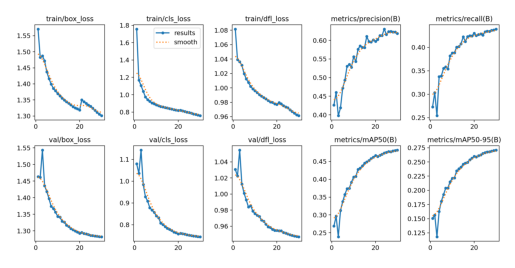

In [7]:
img = mpimg.imread('./runs/epoch30_batch128/train/results.png')
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()


In [22]:
model =  YOLO("yolo11n.pt")
train(model, epoch=50, batch_size=128)

del model
torch.cuda.empty_cache()
gc.collect()
torch.cuda.empty_cache()
gc.collect()

Ultralytics 8.3.86 🚀 Python-3.9.21 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 3090, 24161MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=bdd.yaml, epochs=50, time=None, patience=100, batch=128, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=./runs/epoch50_batch128, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tru

train: Scanning /home/dilab/Seong/dl_proj/data/labels/train_train.cache... 59863 images, 137 backgrounds, 0 corrupt: 100%|██████████| 60000/60000 [00:00<?, ?it/s]
val: Scanning /home/dilab/Seong/dl_proj/data/labels/train_val.cache... 10000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10000/10000 [00:00<?, ?it/s]


Plotting labels to runs/epoch50_batch128/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.001), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/epoch50_batch128/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      21.3G      1.571      1.757      1.082       2860        640: 100%|██████████| 469/469 [03:45<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:31<00:00,  1.26it/s]


                   all      10000     182186      0.426      0.273      0.269       0.15

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      21.2G      1.484      1.169      1.039       3169        640: 100%|██████████| 469/469 [03:44<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:30<00:00,  1.33it/s]


                   all      10000     182186      0.476      0.303        0.3      0.159

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      20.7G      1.488      1.108      1.036       3971        640:  83%|████████▎ | 389/469 [03:06<00:40,  1.97it/s]

       3/50      20.7G      1.488      1.108      1.036       4185        640:  84%|████████▍ | 393/469 [03:15<01:31,  1.21s/it]

       3/50      20.7G       1.49      1.106      1.037       3344        640: 100%|██████████| 469/469 [03:59<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:29<00:00,  1.34it/s]


                   all      10000     182186       0.47      0.282      0.268      0.137

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50        21G      1.475      1.041      1.033       3380        640: 100%|██████████| 469/469 [03:45<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:29<00:00,  1.36it/s]


                   all      10000     182186      0.431      0.324      0.309      0.162

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      21.2G       1.44     0.9763      1.021       2963        640: 100%|██████████| 469/469 [03:44<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:30<00:00,  1.32it/s]


                   all      10000     182186      0.472      0.343      0.335      0.179

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50        21G       1.42     0.9469      1.015       3379        640: 100%|██████████| 469/469 [03:45<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:29<00:00,  1.34it/s]


                   all      10000     182186      0.493      0.349      0.348      0.184

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      20.8G      1.404     0.9273       1.01       3066        640: 100%|██████████| 469/469 [03:44<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:30<00:00,  1.31it/s]


                   all      10000     182186      0.493       0.36      0.361      0.194

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      22.3G      1.396     0.9176      1.005       4183        640:  13%|█▎        | 63/469 [00:30<03:15,  2.07it/s]

       8/50      20.3G      1.395     0.9136      1.005       3827        640:  52%|█████▏    | 243/469 [02:05<01:49,  2.07it/s]

       8/50      20.6G      1.393     0.9117      1.005       4372        640:  84%|████████▍ | 393/469 [03:24<00:37,  2.05it/s]

       8/50      20.6G      1.391     0.9105      1.004       3280        640: 100%|██████████| 469/469 [04:09<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:29<00:00,  1.34it/s]


                   all      10000     182186      0.531      0.376      0.383      0.205

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      20.8G      1.384     0.8996      1.001       3348        640: 100%|██████████| 469/469 [03:45<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:29<00:00,  1.34it/s]


                   all      10000     182186      0.503      0.365      0.377      0.203

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      20.9G      1.375     0.8892     0.9983       2989        640: 100%|██████████| 469/469 [03:44<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:29<00:00,  1.34it/s]


                   all      10000     182186      0.546      0.383      0.403       0.22

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      22.1G      1.369     0.8815     0.9964       2919        640: 100%|██████████| 469/469 [03:45<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:30<00:00,  1.32it/s]


                   all      10000     182186      0.544      0.374      0.398      0.215

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      21.3G      1.363     0.8736     0.9937       3252        640: 100%|██████████| 469/469 [03:45<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:29<00:00,  1.34it/s]


                   all      10000     182186      0.558      0.395      0.415      0.227

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      20.9G      1.358     0.8687     0.9917       3231        640: 100%|██████████| 469/469 [03:44<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:29<00:00,  1.35it/s]


                   all      10000     182186      0.568      0.405      0.425      0.233

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      22.1G      1.353     0.8623     0.9899       2996        640: 100%|██████████| 469/469 [03:45<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:29<00:00,  1.35it/s]


                   all      10000     182186      0.582      0.399       0.43      0.236

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      20.8G      1.351     0.8581     0.9886       2894        640: 100%|██████████| 469/469 [03:44<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:29<00:00,  1.36it/s]


                   all      10000     182186      0.598      0.405       0.44      0.242

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      20.6G      1.346     0.8532     0.9874       2973        640: 100%|██████████| 469/469 [03:45<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:30<00:00,  1.33it/s]


                   all      10000     182186        0.6      0.407      0.444      0.245

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      22.2G      1.342     0.8473     0.9859       4482        640:  64%|██████▍   | 299/469 [02:23<01:22,  2.05it/s]

      17/50        22G      1.342     0.8486     0.9861       3050        640: 100%|██████████| 469/469 [03:53<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:29<00:00,  1.34it/s]


                   all      10000     182186       0.59      0.412      0.446      0.247

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      20.9G      1.341     0.8465     0.9873       4636        640:  28%|██▊       | 131/469 [01:03<02:43,  2.07it/s]

      18/50      20.9G       1.34     0.8452     0.9854       3121        640: 100%|██████████| 469/469 [03:52<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:29<00:00,  1.34it/s]


                   all      10000     182186      0.589      0.419      0.452       0.25

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      22.1G      1.338      0.842     0.9833       3286        640: 100%|██████████| 469/469 [03:45<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:29<00:00,  1.37it/s]


                   all      10000     182186      0.614       0.42      0.459      0.255

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      21.1G      1.336     0.8385     0.9834       2831        640: 100%|██████████| 469/469 [03:44<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:29<00:00,  1.35it/s]


                   all      10000     182186       0.61      0.428      0.464      0.258

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      20.9G      1.332     0.8346     0.9825       3227        640: 100%|██████████| 469/469 [03:45<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:30<00:00,  1.32it/s]


                   all      10000     182186      0.593      0.431      0.463      0.256

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      22.1G       1.33     0.8327     0.9811       4282        640:  46%|████▋     | 217/469 [01:43<02:00,  2.09it/s]

      22/50      22.2G      1.331     0.8328     0.9811       3410        640: 100%|██████████| 469/469 [03:52<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:29<00:00,  1.35it/s]


                   all      10000     182186      0.612      0.428      0.469       0.26

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      20.3G      1.325     0.8273     0.9804       3973        640:  52%|█████▏    | 243/469 [01:56<01:48,  2.08it/s]

      23/50      20.4G      1.326      0.829       0.98       3878        640:  95%|█████████▍| 445/469 [03:41<00:11,  2.10it/s]

      23/50      20.4G      1.326     0.8289       0.98       3085        640: 100%|██████████| 469/469 [04:00<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:30<00:00,  1.33it/s]


                   all      10000     182186      0.602      0.434      0.467       0.26

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      21.1G      1.324     0.8262     0.9797       3116        640: 100%|██████████| 469/469 [03:45<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:29<00:00,  1.35it/s]


                   all      10000     182186      0.604      0.432       0.47      0.261

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      20.8G      1.321     0.8228      0.978       3175        640: 100%|██████████| 469/469 [03:44<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:29<00:00,  1.36it/s]


                   all      10000     182186      0.604      0.432      0.471      0.262

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      21.7G       1.32     0.8198     0.9772       3154        640: 100%|██████████| 469/469 [03:44<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:29<00:00,  1.34it/s]


                   all      10000     182186      0.609      0.436      0.474      0.264

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      21.8G      1.315     0.8191     0.9767       3443        640: 100%|██████████| 469/469 [03:45<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:30<00:00,  1.33it/s]


                   all      10000     182186      0.611      0.435      0.476      0.265

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      20.3G      1.314     0.8125     0.9766       4241        640:   6%|▌         | 27/469 [00:13<03:33,  2.07it/s]

      28/50      22.2G      1.315      0.815      0.975       3839        640:  61%|██████    | 287/469 [02:24<01:23,  2.17it/s]

      28/50      22.2G      1.314      0.815     0.9749       3162        640: 100%|██████████| 469/469 [03:59<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:30<00:00,  1.33it/s]


                   all      10000     182186      0.615      0.438      0.479      0.267

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      20.3G      1.316     0.8116     0.9751       3870        640:   9%|▉         | 43/469 [00:20<03:19,  2.14it/s]

      29/50      22.3G      1.311     0.8107     0.9741       2932        640: 100%|██████████| 469/469 [03:52<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:29<00:00,  1.37it/s]


                   all      10000     182186      0.612      0.441      0.482      0.268

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      20.9G      1.309     0.8088     0.9731       2842        640: 100%|██████████| 469/469 [03:45<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:30<00:00,  1.33it/s]


                   all      10000     182186      0.609      0.444      0.483      0.269

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      20.9G      1.309     0.8071     0.9729       3193        640: 100%|██████████| 469/469 [03:45<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:29<00:00,  1.35it/s]


                   all      10000     182186      0.605      0.447      0.484       0.27

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      20.3G        1.3     0.7947     0.9688       4431        640:   6%|▌         | 27/469 [00:13<03:31,  2.09it/s]

      32/50      20.4G      1.302     0.8002     0.9711       3888        640:  38%|███▊      | 179/469 [01:27<01:52,  2.58it/s]

      32/50      20.5G      1.305     0.8028     0.9719       3238        640: 100%|██████████| 469/469 [03:46<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:30<00:00,  1.30it/s]


                   all      10000     182186      0.617      0.444      0.485       0.27

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      21.1G      1.302     0.8003     0.9702       3027        640: 100%|██████████| 469/469 [03:45<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:30<00:00,  1.30it/s]


                   all      10000     182186      0.611      0.448      0.485      0.271

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      21.3G      1.301     0.7991     0.9698       3399        640: 100%|██████████| 469/469 [03:45<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:29<00:00,  1.34it/s]


                   all      10000     182186      0.614      0.446      0.486      0.271

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      21.1G        1.3     0.7969     0.9693       3017        640: 100%|██████████| 469/469 [03:45<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:30<00:00,  1.30it/s]


                   all      10000     182186      0.611      0.453      0.487      0.272

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      20.5G      1.295     0.7924     0.9682       4160        640:  73%|███████▎  | 341/469 [02:43<00:59,  2.17it/s]

      36/50      20.5G      1.295     0.7925     0.9682       4219        640:  84%|████████▍ | 393/469 [03:16<00:36,  2.08it/s]

      36/50      20.5G      1.295     0.7927     0.9682       3241        640: 100%|██████████| 469/469 [04:00<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:29<00:00,  1.35it/s]


                   all      10000     182186      0.617      0.451      0.488      0.272

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      20.6G      1.293     0.7876      0.968       3959        640:  31%|███       | 145/469 [01:09<02:35,  2.08it/s]

      37/50      20.6G      1.293     0.7876     0.9679       4389        640:  35%|███▌      | 165/469 [01:26<02:27,  2.06it/s]

      37/50      20.6G      1.294     0.7897     0.9676       4380        640:  69%|██████▉   | 325/469 [02:50<01:09,  2.06it/s]

      37/50      20.6G      1.295     0.7899     0.9677       3278        640: 100%|██████████| 469/469 [04:07<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:30<00:00,  1.33it/s]


                   all      10000     182186       0.62      0.449      0.488      0.273

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      20.7G      1.289     0.7857     0.9658       4225        640:  67%|██████▋   | 315/469 [02:31<01:13,  2.10it/s]

      38/50      20.7G      1.289     0.7856     0.9658       4447        640:  70%|██████▉   | 327/469 [02:44<01:12,  1.96it/s]

      38/50      20.7G       1.29     0.7863      0.966       3973        640:  80%|████████  | 377/469 [03:15<00:44,  2.08it/s]

      38/50      20.8G       1.29     0.7862     0.9661       3945        640:  88%|████████▊ | 413/469 [03:40<00:26,  2.09it/s]

      38/50      20.8G       1.29     0.7861     0.9659       4466        640:  95%|█████████▍| 445/469 [04:03<00:11,  2.08it/s]

      38/50      20.8G      1.289     0.7857     0.9658       3540        640: 100%|██████████| 469/469 [04:21<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:30<00:00,  1.30it/s]


                   all      10000     182186      0.617       0.45      0.489      0.273

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50        21G      1.288     0.7835      0.965       2935        640: 100%|██████████| 469/469 [03:45<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:30<00:00,  1.33it/s]


                   all      10000     182186      0.619       0.45      0.489      0.273

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      21.3G      1.283     0.7785     0.9637       3001        640: 100%|██████████| 469/469 [03:44<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:30<00:00,  1.31it/s]


                   all      10000     182186      0.618       0.45       0.49      0.274
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      18.9G       1.32     0.7817     0.9678       1638        640: 100%|██████████| 469/469 [03:34<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:30<00:00,  1.31it/s]


                   all      10000     182186       0.62       0.45       0.49      0.274

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      21.1G      1.314     0.7748     0.9652       1673        640: 100%|██████████| 469/469 [03:31<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:30<00:00,  1.31it/s]


                   all      10000     182186      0.617      0.452      0.491      0.274

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      20.5G       1.31     0.7706     0.9646       1634        640: 100%|██████████| 469/469 [03:32<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:30<00:00,  1.30it/s]


                   all      10000     182186      0.622       0.45      0.492      0.275

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      18.6G      1.307     0.7667     0.9636       1502        640: 100%|██████████| 469/469 [03:32<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:30<00:00,  1.31it/s]


                   all      10000     182186      0.623       0.45      0.492      0.275

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      20.9G      1.304     0.7623     0.9628       1722        640: 100%|██████████| 469/469 [03:31<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:30<00:00,  1.30it/s]


                   all      10000     182186      0.624       0.45      0.492      0.275

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      20.9G        1.3     0.7577     0.9603       1700        640: 100%|██████████| 469/469 [03:32<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:30<00:00,  1.31it/s]


                   all      10000     182186      0.625      0.451      0.492      0.276

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      21.5G      1.297     0.7527     0.9595       1700        640: 100%|██████████| 469/469 [03:32<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:29<00:00,  1.36it/s]


                   all      10000     182186      0.627      0.451      0.492      0.276

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      19.7G      1.292     0.7476     0.9579       1678        640: 100%|██████████| 469/469 [03:32<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:30<00:00,  1.32it/s]


                   all      10000     182186      0.629      0.449      0.492      0.276

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      18.9G      1.289      0.742     0.9562       1542        640: 100%|██████████| 469/469 [03:32<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:30<00:00,  1.30it/s]


                   all      10000     182186       0.63      0.449      0.493      0.276

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      19.9G      1.283     0.7377     0.9551       1614        640: 100%|██████████| 469/469 [03:31<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:30<00:00,  1.30it/s]


                   all      10000     182186      0.627      0.451      0.493      0.277

50 epochs completed in 3.577 hours.
Optimizer stripped from runs/epoch50_batch128/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/epoch50_batch128/train/weights/best.pt, 5.5MB

Validating runs/epoch50_batch128/train/weights/best.pt...
Ultralytics 8.3.86 🚀 Python-3.9.21 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 3090, 24161MiB)
YOLO11n summary (fused): 100 layers, 2,583,907 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:54<00:00,  1.37s/it]


                   all      10000     182186      0.627      0.451      0.493      0.277
                person       3130      12876      0.633       0.46      0.518      0.247
                   car       9898     101525      0.722      0.688      0.737      0.454
                 rider        528        653      0.619      0.315      0.352      0.169
                   bus       1323       1694      0.627      0.531      0.574      0.447
                 truck       2682       4168      0.599       0.53       0.56      0.405
                  bike        637       1038      0.549      0.321      0.346      0.158
                 motor        330        425      0.576      0.278      0.315      0.158
         traffic light       5490      25702      0.627      0.457      0.487      0.175
          traffic sign       8148      34105      0.688      0.475      0.543      0.275
Speed: 0.1ms preprocess, 0.3ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/epoch5

0

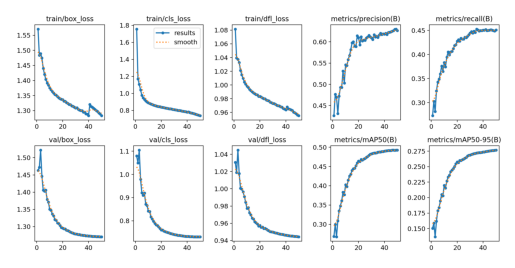

In [8]:
img = mpimg.imread('./runs/epoch50_batch128/train/results.png')
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()


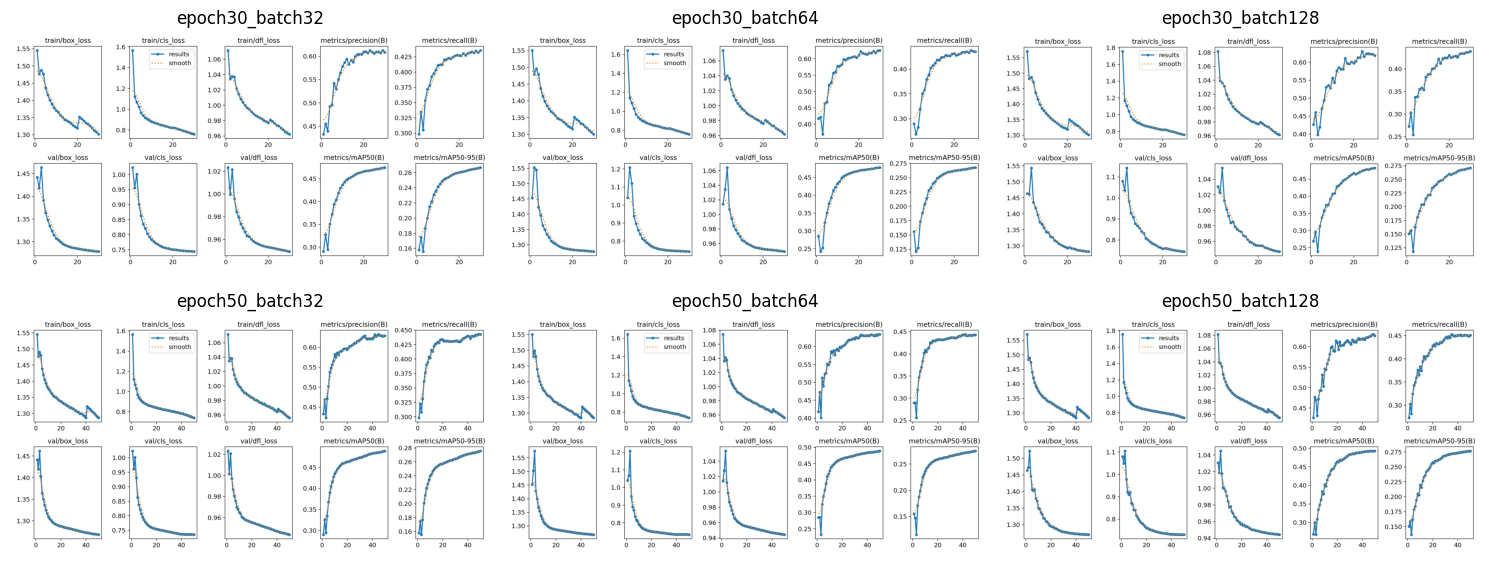

In [2]:
# Comparison of models
configs = [
    ("epoch30", "batch32", "train2"), ("epoch30", "batch64", "train2"), ("epoch30", "batch128", "train"),
    ("epoch50", "batch32", "train"), ("epoch50", "batch64", "train"), ("epoch50", "batch128", "train")
]

fig, axes = plt.subplots(2, 3, figsize=(15, 6))

for ax, (epoch, batch, train_folder) in zip(axes.flat, configs):
    img_path = f'./runs/{epoch}_{batch}/{train_folder}/results.png'  
    img = mpimg.imread(img_path)  
    ax.imshow(img)
    ax.set_title(f"{epoch}_{batch}")  
    ax.axis('off') 

plt.tight_layout()
plt.show()


In [6]:
metrics_columns = ["metrics/precision(B)", "metrics/recall(B)", "metrics/mAP50(B)", "metrics/mAP50-95(B)"]
results = pd.DataFrame(columns=["config"] + metrics_columns + ["Average"])

for epoch, batch, train in configs:
    file_path = f"./runs/{epoch}_{batch}/{train}/results.csv"
    df = pd.read_csv(file_path)
    last_row = df.iloc[-1] 
    metrics_data = [last_row[col] for col in metrics_columns]
    average = sum(metrics_data) / len(metrics_data)

    results.loc[len(results)] = [f"{epoch}_{batch}"] + metrics_data + [average]

results

,config,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),Average
0,epoch30_batch32,0.60828,0.43558,0.47444,0.26678,0.446270
1,epoch30_batch64,0.62545,0.43496,0.47760,0.26771,0.451430
2,epoch30_batch128,0.61844,0.43915,0.48201,0.27083,0.452608
3,epoch50_batch32,0.62893,0.44263,0.48865,0.27557,0.458945
4,epoch50_batch64,0.63412,0.44282,0.48871,0.27489,0.460135
5,epoch50_batch128,0.62655,0.45083,0.49253,0.27666,0.461643


In [ ]:
# best model : epoch50 batch 128
# larger epoch, larger batch performs better 
# not able to test on batch 256 due to GPU memory constraint but planning to train few more epochs 

#### Object Detection Inference


image 1/1 /home/dilab/Seong/dl_proj/data/images/val/c6959e96-3e8a0c43.jpg: 384x640 15 cars, 3 traffic signs, 2.7ms
Speed: 0.7ms preprocess, 2.7ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/dilab/Seong/dl_proj/data/images/val/c69e5864-1e46bd03.jpg: 384x640 3 persons, 1 car, 9 traffic signs, 3.0ms
Speed: 0.8ms preprocess, 3.0ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/dilab/Seong/dl_proj/data/images/val/c6424a42-272aa782.jpg: 384x640 1 person, 11 cars, 1 truck, 6 traffic lights, 1 traffic sign, 3.0ms
Speed: 0.7ms preprocess, 3.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/dilab/Seong/dl_proj/data/images/val/b5465c6e-0aad0ec3.jpg: 384x640 7 cars, 1 bus, 1 truck, 6 traffic lights, 4 traffic signs, 3.1ms
Speed: 0.7ms preprocess, 3.1ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/dilab/Seong/dl_proj/data/images/val/c8fa732b-fbdaa989.jpg

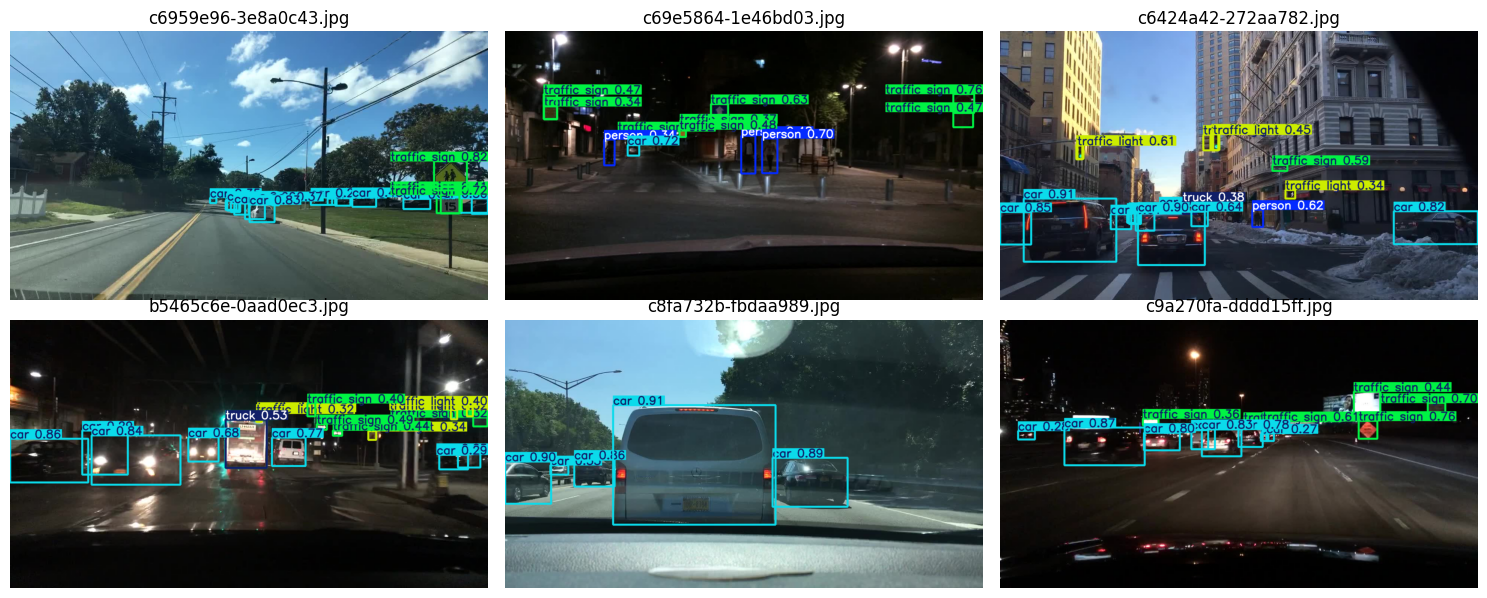

In [11]:
import os
best_model_pth = './runs/epoch50_batch128/train/weights/best.pt'

model = YOLO(best_model_pth)

val_image_dir = "./data/images/val"

image_files = [f for f in os.listdir(val_image_dir)][:6]

fig, axes = plt.subplots(2, 3, figsize=(15, 6))

for ax, img_file in zip(axes.flat, image_files):
    img_path = os.path.join(val_image_dir, img_file)
    
    results = model(img_path)
    vis = results[0].plot() 

    ax.imshow(cv2.cvtColor(vis, cv2.COLOR_BGR2RGB))
    ax.set_title(img_file)
    ax.axis("off")

plt.tight_layout()
plt.show()

In [15]:
# Model evaluation on test set
model = YOLO(best_model_pth)
metrics = model.val(split='val',
        project=os.path.join('./runs', best_model_pth.split('/')[2]),
        name='test')

Ultralytics 8.3.86 🚀 Python-3.9.21 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 3090, 24161MiB)
YOLO11n summary (fused): 100 layers, 2,583,907 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning /home/dilab/Seong/dl_proj/data/labels/train_val.cache... 10000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10000/10000 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 625/625 [00:58<00:00, 10.60it/s]


                   all      10000     182186      0.628      0.451      0.493      0.277
                person       3130      12876      0.635       0.46      0.519      0.248
                   car       9898     101525      0.722      0.688      0.737      0.455
                 rider        528        653       0.62      0.315      0.352      0.169
                   bus       1323       1694      0.629      0.532      0.574      0.447
                 truck       2682       4168        0.6       0.53       0.56      0.406
                  bike        637       1038      0.546      0.318      0.344      0.157
                 motor        330        425      0.581      0.281      0.317      0.158
         traffic light       5490      25702      0.632      0.458       0.49      0.176
          traffic sign       8148      34105       0.69      0.475      0.544      0.277
Speed: 0.1ms preprocess, 0.6ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs/epoch5

In [ ]:
model = YOLO('./runs/epoch50_batch128/train/weights/best.pt')

img_path = "/home/dilab/Seong/dl_proj/data/images/val/c9a270fa-dddd15ff.jpg"
results = model(img_path)
results[0].boxes.xyxy


image 1/1 /home/dilab/Seong/dl_proj/data/images/val/c9a270fa-dddd15ff.jpg: 384x640 9 cars, 6 traffic signs, 2.7ms
Speed: 0.7ms preprocess, 2.7ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


tensor([[ 172.7362,  290.3423,  387.3070,  391.9739],
        [ 540.3751,  294.2411,  646.8113,  367.1428],
        [ 385.5360,  304.0076,  481.0011,  351.8023],
        [ 638.4484,  294.6358,  703.6580,  342.7314],
        [ 960.4924,  272.5195, 1010.1247,  320.9208],
        [1145.4722,  224.7424, 1192.1392,  259.8810],
        [ 703.0465,  273.5047,  737.4523,  288.8456],
        [ 512.1004,  295.7944,  575.4641,  348.1095],
        [ 947.5551,  194.3634, 1018.9238,  271.1964],
        [ 512.9236,  297.9580,  557.8027,  348.8911],
        [ 382.5406,  266.3904,  424.0469,  284.2516],
        [ 652.0306,  275.2522,  669.7091,  290.0474],
        [  48.2371,  299.8382,   93.5338,  322.7466],
        [ 713.4360,  306.0822,  733.7219,  326.7228],
        [ 698.8137,  307.0680,  718.7380,  326.9865]], device='cuda:0')

In [ ]:

# Export the model to ONNX format
# path = model.export(format="onnx")  # return path to exported model